In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = pd.read_csv("/content/bank-additional-full.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:

data=data.drop(['duration'],axis=1)
print(data.shape)
data.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


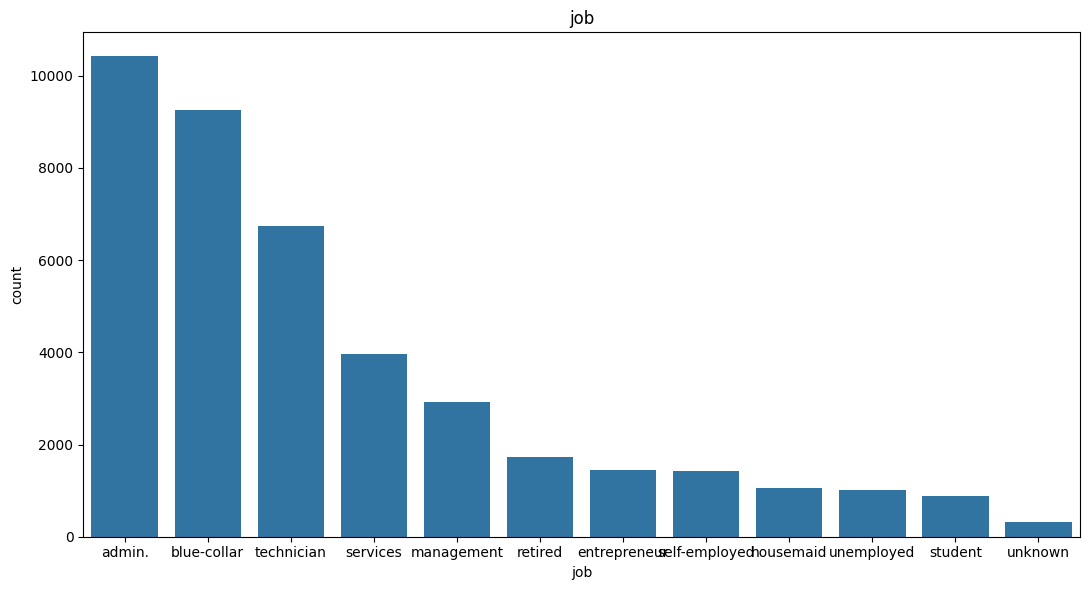

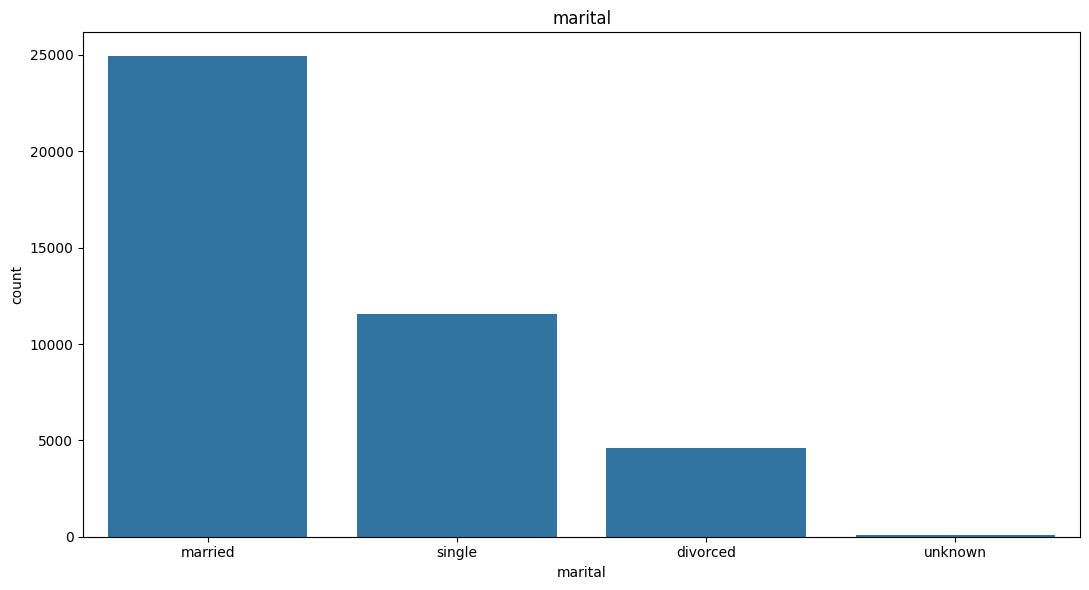

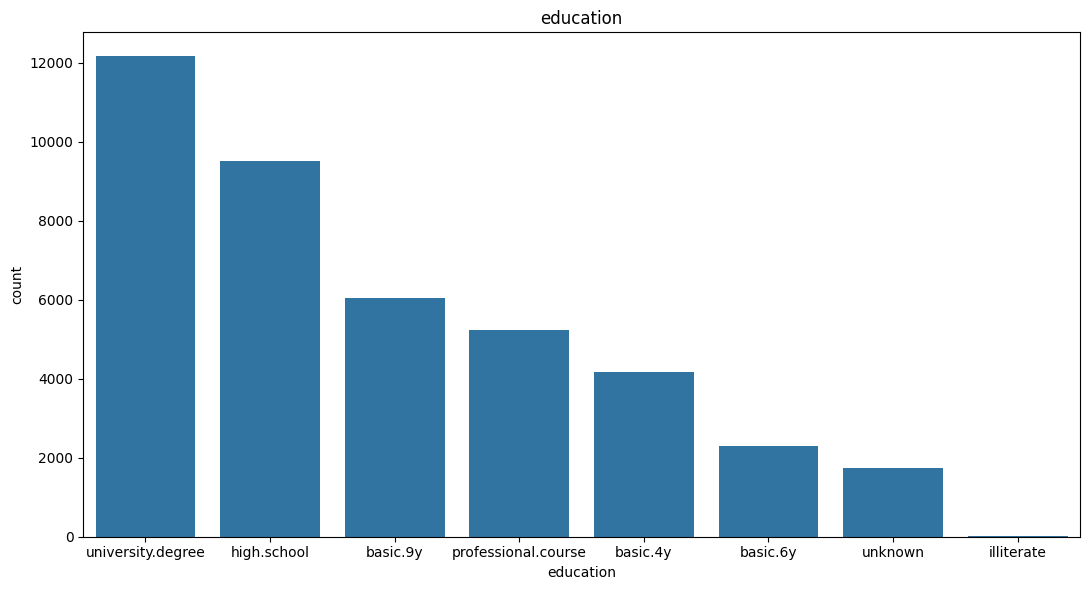

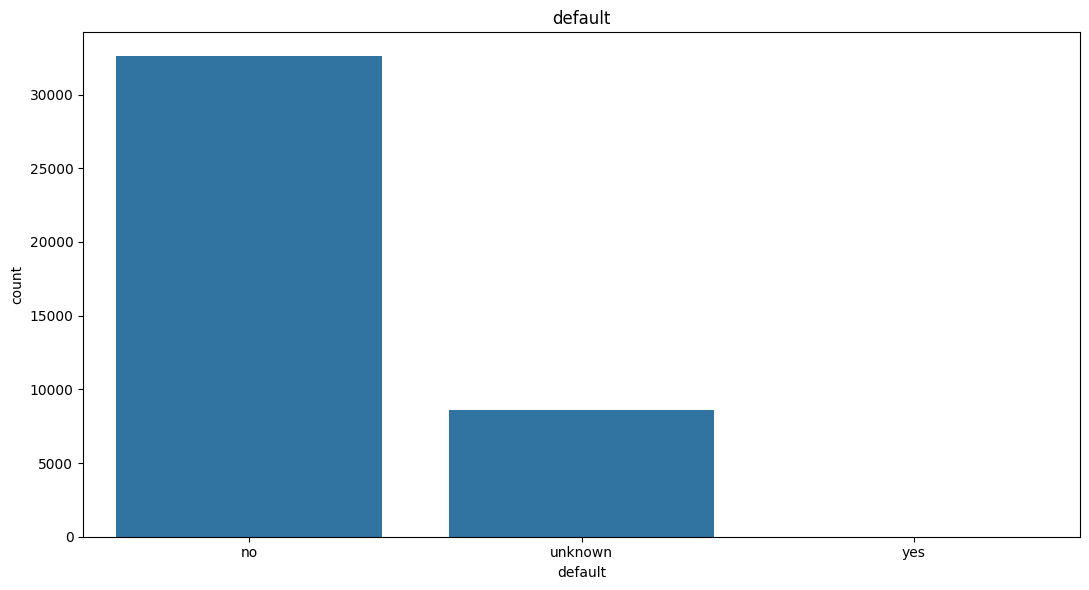

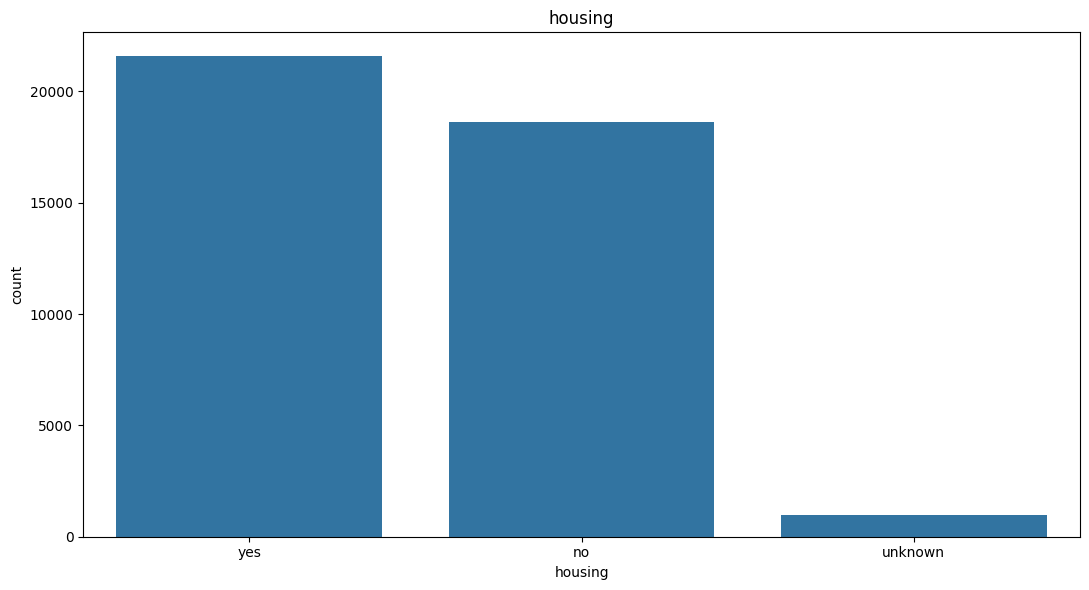

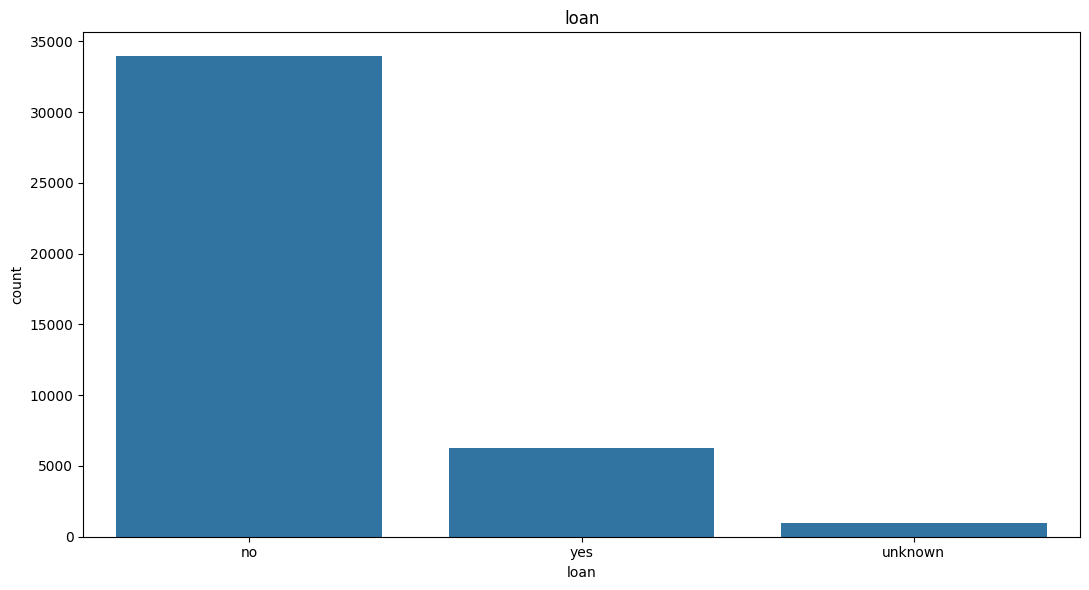

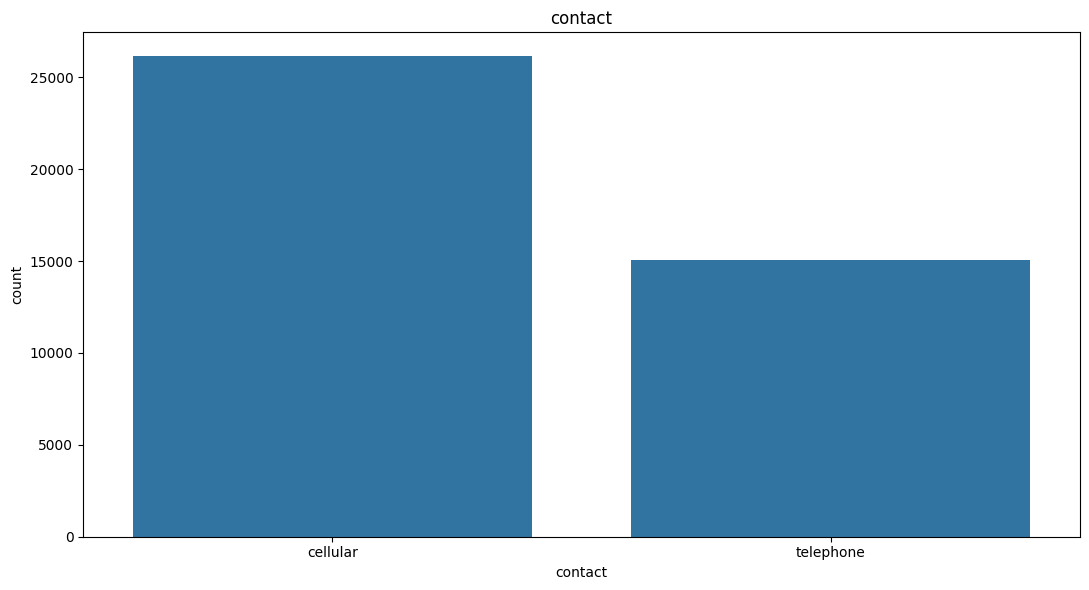

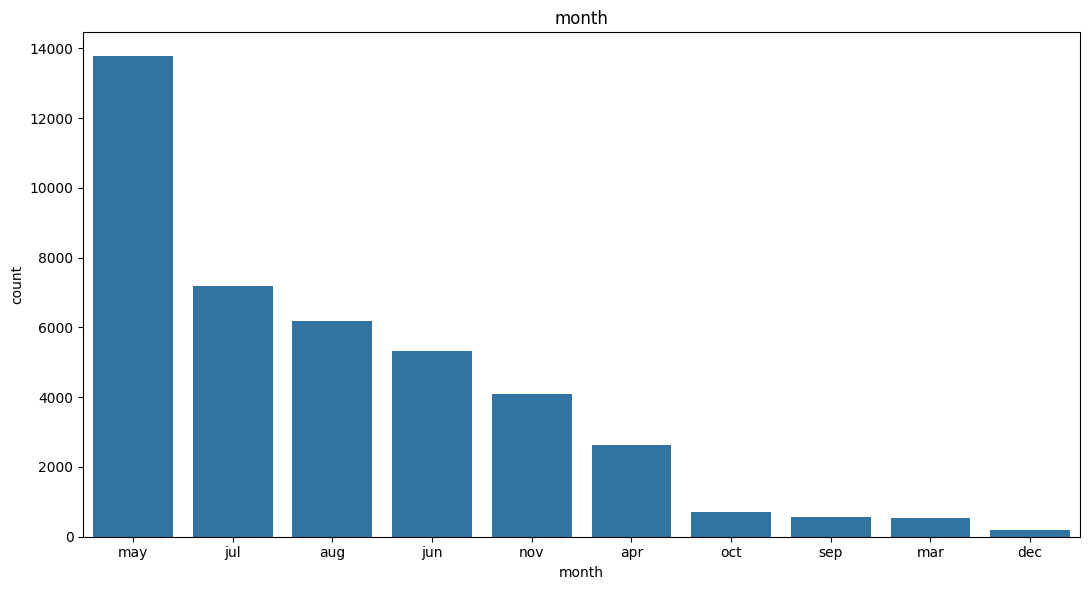

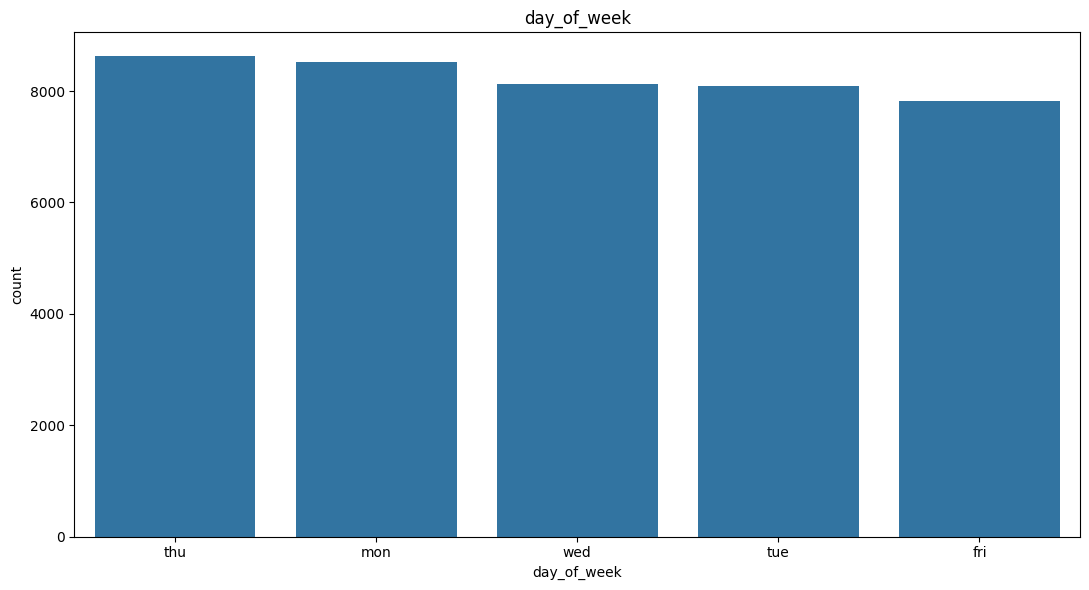

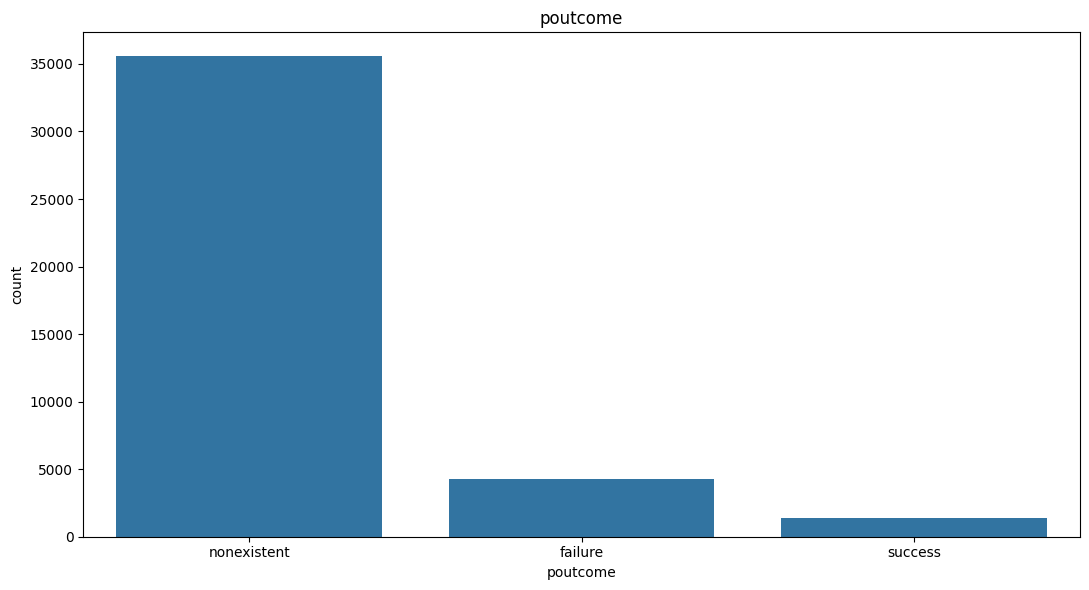

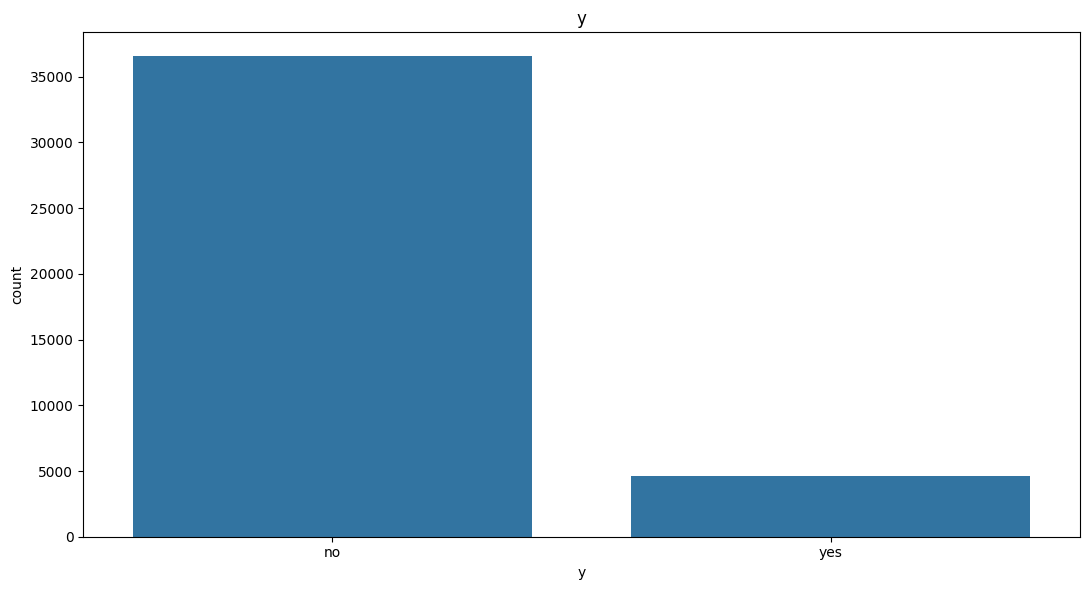

In [ ]:
categori=['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categori:
    plt.figure(figsize=(11,6))
    # The 'x' and 'y' data are derived from the 'col' column of the DataFrame.
    # The 'data' argument is no longer needed as the data is already provided through 'x' and 'y'.
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts())
    plt.title(col)
    plt.tight_layout()

In [ ]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        # https://www.youtube.com/watch?v=qy0fDqoMJx8 for groupby operation
        #https://www.youtube.com/watch?v=hfDXRyYIFkk grupby count
        #https://data36.com/pandas-tutorial-2-aggregation-and-grouping/
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
        #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [ ]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [ ]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [ ]:
cross_tab(data,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [ ]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                 no   yes  unknown
job                               
admin.         4636  5559      227
blue-collar    4362  4752      241
entrepreneur    641   779       36
housemaid       491   540       29
management     1363  1490       71
retired         789   908       44
self-employed   641   740       40
services       1818  2050      101
student         381   471       23
technician     2985  3621      147
unemployed      430   557       27
unknown          85   109        4


In [ ]:
def fillhousing(data,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        #Here we are taking value in which housing is unknow and job value is known
        ind=data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"housing"]='no'
        data.loc[ind2,"housing"]='yes'
    return data

In [ ]:
data=fillhousing(data,jobhousing)

In [ ]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                 no   yes  unknown
job                               
admin.         4738  5684      0.0
blue-collar    4476  4879      0.0
entrepreneur    659   797      0.0
housemaid       504   556      0.0
management     1401  1523      0.0
retired         806   935      0.0
self-employed   658   763      0.0
services       1861  2108      0.0
student         389   486      0.0
technician     3052  3701      0.0
unemployed      437   577      0.0
unknown          85   109      4.0


In [ ]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes  unknown
job                               
admin.         8485  1710      227
blue-collar    7730  1384      241
entrepreneur   1214   206       36
housemaid       877   154       29
management     2414   439       71
retired        1452   245       44
self-employed  1186   195       40
services       3267   601      101
student         710   142       23
technician     5615   991      147
unemployed      838   149       27
unknown         162    32        4


In [ ]:
def fillloan(data,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=data[np.logical_and(np.array(data['loan']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"loan"]='no'
        data.loc[ind2,"loan"]='yes'
    return data

In [ ]:
data=fillloan(data,jobloan)

In [ ]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)


                 no   yes  unknown
job                               
admin.         8680  1742      0.0
blue-collar    7925  1430      0.0
entrepreneur   1247   209      0.0
housemaid       905   155      0.0
management     2467   457      0.0
retired        1486   255      0.0
self-employed  1216   205      0.0
services       3355   614      0.0
student         733   142      0.0
technician     5747  1006      0.0
unemployed      860   154      0.0
unknown         162    32      4.0


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.y.value_counts()

,count
y,
no,36548
yes,4640


<ipython-input-25-f0fa43c3cc41>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].clip(lower = lower_lim,upper = upper_lim,inplace = True)
<ipython-input-25-f0fa43c3cc41>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[i].clip(lower = lower_lim,upper = upper_lim,inplace = True)
<ipython-input-25-f0fa43c3cc41>:9: FutureWarning: A value is tryin

Axes(0.125,0.11;0.775x0.77)


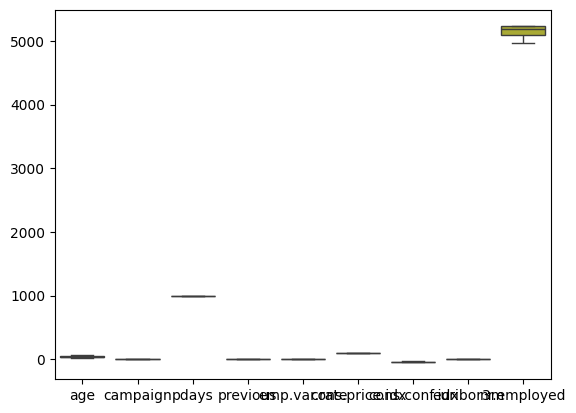

In [ ]:
def outlier_val(df):
  for i in df:
    if df[i].dtypes in ["float64","int64"]:
       q1= df[i].quantile(0.25)
       q3= df[i].quantile(0.75)
       iqr= q3-q1
       lower_lim= q1-1.5*iqr
       upper_lim= q3+1.5*iqr
       df[i].clip(lower = lower_lim,upper = upper_lim,inplace = True)
outlier_val(data)
print(sns.boxplot(data=data))

In [ ]:
data_num = data.select_dtypes(include=[np.number])
data_num.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
data_cat = data_cat.apply(LabelEncoder().fit_transform)
data_cat.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0


In [ ]:
data = pd.concat([data_num, data_cat],axis=1)
data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0
2,37.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1,0
3,40.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1,0
4,56.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separating features and target
X = data.drop(columns=['y'])  # Replace 'target' with your actual target column name
y = data['y']

# Splitting the dataset into train and test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
data.y.value_counts()

,count
y,
0,36548
1,4640


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
import pandas as pd
print(pd.Series(y_train_resampled).value_counts())

y
0    25580
1    25580
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Fit only on train data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the scaled data
display(X_train_scaled.head())
display(X_test_scaled.head())


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-0.975604,0.734650,0.0,0.0,-1.451401,-1.207228,1.344310,-1.190682,-1.279848,-1.037283,-0.203999,1.047822,-0.382813,-1.056318,-0.399578,-0.564619,-0.873762,-0.670142,-2.115549
1,-0.975604,1.458547,0.0,0.0,-0.754868,-0.923490,-1.118224,-0.904402,-0.413762,1.481181,1.408326,1.047822,-0.382813,-1.056318,-0.399578,1.771106,0.733186,-1.418727,0.211760
2,0.432321,0.010754,0.0,0.0,0.928421,0.812042,0.710021,1.005898,0.639059,-0.757454,-0.203999,-1.344346,2.610415,1.024913,-0.399578,1.771106,0.733186,0.078443,0.211760
3,-0.535627,-0.713143,0.0,0.0,-0.754868,-0.923490,-1.118224,-0.863656,-0.413762,0.921522,-0.203999,1.047822,-0.382813,-1.056318,-0.399578,-0.564619,0.733186,0.078443,-2.115549
4,-0.711618,2.906340,0.0,0.0,-0.754868,-0.923490,-1.118224,-0.904402,-0.413762,-1.037283,1.408326,-0.387479,-0.382813,-1.056318,-0.399578,-0.564619,0.733186,-1.418727,0.211760


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1.488265,-0.713143,0.0,0.0,-0.754868,-0.923490,-1.118224,-0.878472,-0.413762,1.481181,-0.203999,-0.387479,-0.382813,-1.056318,2.771755,-0.564619,0.733186,-0.670142,-2.115549
1,1.312274,0.010754,0.0,0.0,0.928421,0.812042,0.710021,1.005898,0.639059,2.040840,-0.203999,1.526255,2.610415,1.024913,-0.399578,1.771106,0.733186,0.078443,0.211760
2,-0.623623,-0.713143,0.0,0.0,-0.754868,-0.923490,-1.118224,-0.871064,-0.413762,-0.757454,-0.203999,-0.865912,-0.382813,-1.056318,-0.399578,-0.564619,0.733186,-1.418727,-2.115549
3,-0.359637,1.458547,0.0,0.0,1.102555,1.554490,-0.297380,1.062519,1.064083,-1.037283,-0.203999,-0.387479,-0.382813,-1.056318,-0.399578,1.771106,-0.070288,-1.418727,0.211760
4,-1.151595,0.010754,0.0,0.0,1.102555,0.692241,-0.465280,1.060402,1.064083,-0.197795,-0.203999,-0.387479,-0.382813,1.024913,-0.399578,-0.564619,-0.472025,-1.418727,0.211760


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [20, 45, 70],   # Number of trees
    'max_depth': [4, 6, 8],           # Depth of trees
    'min_samples_split': [50, 75, 100],  # Min samples to split
    'min_samples_leaf': [20, 30, 40]     # Min samples per leaf
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)
# Get the best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Train the best model on full scaled training data
best_rf.fit(X_train_scaled, y_train_resampled)

# Evaluate on test data
y_pred = best_rf.predict(X_test_scaled)
print("Model Accuracy (All Features):", accuracy_score(y_test, y_pred))
print("Classification Report (All Features):\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecting only the most important features (threshold can be adjusted)
top_features = feature_importances[feature_importances["Importance"] > 0.01]["Feature"].tolist()
print("Selected Features:", top_features)

# Use only important features
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

# Train Random Forest again with selected features
best_rf.fit(X_train_selected, y_train_resampled)

# Evaluate again
y_pred_selected = best_rf.predict(X_test_selected)
print("Retrained Model Accuracy (Selected Features):", accuracy_score(y_test, y_pred_selected))
print("Retrained Classification Report (Selected Features):\n", classification_report(y_test, y_pred_selected))


Best Parameters: {'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 70}
Model Accuracy (All Features): 0.8334547220199078
Classification Report (All Features):
               precision    recall  f1-score   support

           0       0.94      0.87      0.90     10968
           1       0.35      0.58      0.44      1389

    accuracy                           0.83     12357
   macro avg       0.65      0.72      0.67     12357
weighted avg       0.88      0.83      0.85     12357

Selected Features: ['euribor3m', 'nr.employed', 'emp.var.rate', 'contact', 'cons.conf.idx', 'default', 'cons.price.idx', 'housing', 'month', 'loan', 'campaign', 'age', 'marital', 'day_of_week']
Retrained Model Accuracy (Selected Features): 0.8464837743788945
Retrained Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     10968
           1       0.38      0.57      0.45      1389

    

In [ ]:
import pickle

pickle.dump(best_rf, open(r"C:\Users\Dell\OneDrive\Desktop\deposit_ML_deploy\build2.pkl",'wb'))